<h1><b> Association of market store data

<b>Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/root/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/root/Documents/Projects/NLP/NLP Datasets/store_data.csv')

In [3]:
df.tail()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(7500, 20)

<b>Unique Items 

In [5]:
items = (df['shrimp'].unique())

In [11]:
items

array(['burgers', 'chutney', 'turkey', 'mineral water', 'low fat yogurt',
       'whole wheat pasta', 'soup', 'frozen vegetables', 'french fries',
       'eggs', 'cookies', 'spaghetti', 'shrimp', 'meatballs', 'red wine',
       'rice', 'parmesan cheese', 'ground beef', 'sparkling water',
       'herb & pepper', 'pickles', 'energy bar', 'fresh tuna', 'escalope',
       'avocado', 'tomato sauce', 'clothes accessories', 'energy drink',
       'chocolate', 'grated cheese', 'yogurt cake', 'mint', 'asparagus',
       'champagne', 'ham', 'muffins', 'french wine', 'chicken', 'pasta',
       'tomatoes', 'pancakes', 'frozen smoothie', 'carrots', 'yams',
       'shallot', 'butter', 'light mayo', 'pepper', 'candy bars',
       'cooking oil', 'milk', 'green tea', 'bug spray', 'oil',
       'olive oil', 'salmon', 'cake', 'almonds', 'salt', 'strong cheese',
       'hot dogs', 'pet food', 'whole wheat rice', 'antioxydant juice',
       'honey', 'sandwich', 'salad', 'magazines', 'protein bar',
       '

<b> Detection of items in each transaction

In [12]:
new_items = []

for index,row in df.iterrows():
    label={}
    uncomman = list(set(items)-set(row))
    comman = list(set(items).intersection(row))
    for uc in uncomman:
        label[uc] = 0
    for c in comman:
        label[c] = 1
    new_items.append(label)
one_zero = pd.DataFrame(new_items)

In [13]:
one_zero

,cider,shampoo,frozen smoothie,french wine,chutney,chicken,burger sauce,cottage cheese,soda,extra dark chocolate,...,sparkling water,dessert wine,cooking oil,cauliflower,mint,yams,corn,meatballs,eggs,burgers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
7497,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#labraries for association
from mlxtend.frequent_patterns import apriori,association_rules

In [15]:
freq_items = apriori(one_zero,min_support=0.01,verbose=1,use_colnames=True)

Processing 184 combinations | Sampling itemset size 43


In [16]:
# Confidance each item combination 
freq_items

,support,itemsets
0,0.010533,(cider)
1,0.063200,(frozen smoothie)
2,0.022533,(french wine)
3,0.060000,(chicken)
4,0.031733,(cottage cheese)
...,...,...
254,0.010133,"(ground beef, mineral water, eggs)"
255,0.011067,"(milk, mineral water, frozen vegetables)"
256,0.014000,"(chocolate, mineral water, milk)"
257,0.013067,"(milk, eggs, mineral water)"


In [17]:
rules = association_rules(freq_items,min_threshold=0)

In [21]:
# Final result of association 
rules.iloc[10:20,]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(chocolate),(frozen smoothie),0.163867,0.063200,0.014933,0.091131,1.441946,0.004577,1.030732
11,(frozen smoothie),(chocolate),0.063200,0.163867,0.014933,0.236287,1.441946,0.004577,1.094827
12,(frozen smoothie),(french fries),0.063200,0.170933,0.014533,0.229958,1.345307,0.003730,1.076651
13,(french fries),(frozen smoothie),0.170933,0.063200,0.014533,0.085023,1.345307,0.003730,1.023851
14,(frozen smoothie),(eggs),0.063200,0.179733,0.011067,0.175105,0.974252,-0.000292,0.994390
15,(eggs),(frozen smoothie),0.179733,0.063200,0.011067,0.061573,0.974252,-0.000292,0.998266
16,(green tea),(chicken),0.132000,0.060000,0.011867,0.089899,1.498316,0.003947,1.032852
17,(chicken),(green tea),0.060000,0.132000,0.011867,0.197778,1.498316,0.003947,1.081994
18,(spaghetti),(chicken),0.174133,0.060000,0.017200,0.098775,1.646248,0.006752,1.043025
19,(chicken),(spaghetti),0.060000,0.174133,0.017200,0.286667,1.646248,0.006752,1.157757


<b>Relation between lift and confidance

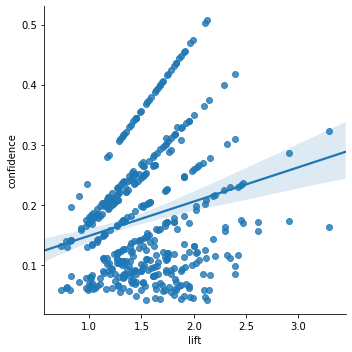

In [19]:
sns.lmplot('lift','confidence',data=rules)